In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Naive approach**

In [642]:
raw_ufc_data = pd.read_csv('fight_data.csv')

# Removing irrelavant columns (More details in report)
irrelevant_columns = ['R_odds', 'B_odds', 'R_ev', 'B_ev', 'B_current_lose_streak', 'B_current_win_streak',
                      'B_longest_win_streak', 'R_current_lose_streak', 'R_current_win_streak', 'R_longest_win_streak',
                      'empty_arena', 'constant_1', 'B_match_weightclass_rank', 'R_match_weightclass_rank',
                      "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank",
                      "R_Women's Bantamweight_rank", "R_Heavyweight_rank", "R_Light Heavyweight_rank",
                      'R_Middleweight_rank', 'R_Welterweight_rank', 'R_Lightweight_rank', 'R_Featherweight_rank',
                      'R_Bantamweight_rank', 'R_Flyweight_rank', 'R_Pound-for-Pound_rank',
                      "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank",
                      "B_Women's Bantamweight_rank", 'B_Heavyweight_rank', 'B_Light Heavyweight_rank',
                      'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 'B_Featherweight_rank',
                      'B_Bantamweight_rank', 'B_Flyweight_rank', 'B_Pound-for-Pound_rank', 'r_dec_odds', 'b_dec_odds',
                      'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds']

raw_ufc_data.drop(columns=irrelevant_columns, inplace=True)

In [643]:
# Find the missing rows
missing_rows = {}
for column in raw_ufc_data.columns:
    missing_count = raw_ufc_data[column].isnull().sum()
    missing_rows[column] = missing_count

print("Missing rows for each column:")
for column, missing_count in missing_rows.items():
    print(f"{column}: {missing_count} missing rows")

Missing rows for each column:
R_fighter: 0 missing rows
B_fighter: 0 missing rows
date: 0 missing rows
location: 0 missing rows
country: 0 missing rows
Winner: 0 missing rows
title_bout: 0 missing rows
weight_class: 0 missing rows
gender: 0 missing rows
no_of_rounds: 0 missing rows
B_draw: 0 missing rows
B_avg_SIG_STR_landed: 930 missing rows
B_avg_SIG_STR_pct: 765 missing rows
B_avg_SUB_ATT: 832 missing rows
B_avg_TD_landed: 833 missing rows
B_avg_TD_pct: 842 missing rows
B_losses: 0 missing rows
B_total_rounds_fought: 0 missing rows
B_total_title_bouts: 0 missing rows
B_win_by_Decision_Majority: 0 missing rows
B_win_by_Decision_Split: 0 missing rows
B_win_by_Decision_Unanimous: 0 missing rows
B_win_by_KO/TKO: 0 missing rows
B_win_by_Submission: 0 missing rows
B_win_by_TKO_Doctor_Stoppage: 0 missing rows
B_wins: 0 missing rows
B_Stance: 2 missing rows
B_Height_cms: 0 missing rows
B_Reach_cms: 0 missing rows
B_Weight_lbs: 0 missing rows
R_draw: 0 missing rows
R_avg_SIG_STR_landed: 455 

In [644]:
# Fill missing values with mean
columns_to_fill = ['B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct',
                   'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct']
for column in columns_to_fill:
    raw_ufc_data[column] = raw_ufc_data[column].fillna(raw_ufc_data[column].mean())

In [645]:
# Fill missing values for 'finish' column based on specified distribution
finish_distribution = {'DQ': 0.3, 'KO/TKO': 32, 'M-Dec': 0.6, 'Overturned': 0.04, 'S-dec': 10.4, 'Sub': 18.3, 'U-Dec': 38.17}
for finish_type, percentage in finish_distribution.items():
    num_missing = int(missing_rows['finish'] * percentage / 100)
    raw_ufc_data.loc[raw_ufc_data['finish'].isnull(), 'finish'] = finish_type
    missing_rows['finish'] -= num_missing

In [646]:
# Replace missing values for 'finish_details' with 'blank'
raw_ufc_data['finish_deatils']=raw_ufc_data['finish_details'].fillna('blank')

In [647]:
# Distribute missing values for 'finish_round' based on specified percentages
round_distribution = {1: 25.8, 2: 15.7, 3: 54.1, 4: 0.6, 5: 3.7}
for round_num, percentage in round_distribution.items():
    num_missing = int(missing_rows['finish_round'] * percentage / 100)
    raw_ufc_data.loc[raw_ufc_data['finish_round'].isnull(), 'finish_round'] = round_num
    missing_rows['finish_round'] -= num_missing

In [648]:
# Replace missing values for 'finish_round_time' with '5:00'
raw_ufc_data['finish_round_time']=raw_ufc_data['finish_round_time'].fillna('5:00')
# Calculate and replace missing values for 'total_fight_time_secs' based on (finish round * 5 * 60)
raw_ufc_data['total_fight_time_secs']=raw_ufc_data['total_fight_time_secs'].fillna(raw_ufc_data['finish_round'] * 5 * 60).astype(int)



In [649]:
# Additional cleaning for B_Stance
raw_ufc_data.loc[raw_ufc_data['B_fighter'] == 'Juancamilo Ronderos', 'B_Stance'] = 'Southpaw'
raw_ufc_data.loc[raw_ufc_data['B_fighter'] == 'Juan Espino', 'B_Stance'] = 'Orthodox'

# Function to round numbers to two decimal places
def round_to_two_decimals(value):
    return round(value, 2)

In [650]:
# Convert all numerical columns to two decimal places
numerical_columns = raw_ufc_data.select_dtypes(include='number').columns
raw_ufc_data[numerical_columns] = raw_ufc_data[numerical_columns].map(round_to_two_decimals)
# Fix spacing issue in the 'Country' column
raw_ufc_data['country'] = raw_ufc_data['country'].str.strip()

In [651]:
# Write the updated data to a new file
data=raw_ufc_data

In [652]:
# Finding numerical and categorical data
numrical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

# Using standard scaler for numerical values
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [653]:
# Use label encoding for categorical values
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    data[col] = LE.fit_transform(data[col])

In [654]:
# Separating features and label
y=data['Winner']
X=data.drop(['Winner'], axis=1)

# Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [655]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=3),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=10),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1500),
    'Support Vector Machine': SVC(),
}

print("Using naive method")
# Train and evaluate each model
acc=0
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    acc+=accuracy
print("Average accuracy",acc/len(models))



Using naive method
Decision Tree 0.5479591836734694
Random Forest 0.6091836734693877
K Nearest Neighbour 0.539795918367347
Neural Network 0.5755102040816327
Support Vector Machine 0.6112244897959184
Gradient Boosting 0.5959183673469388
Gaussian Naive Bayes 0.4969387755102041
Average accuracy 0.5680758017492712


..

..

..

**More advanced approach**

In [656]:
data = pd.read_csv('fight_data.csv')
data['Winner']=data['Winner'].map({'Red': 1, 'Blue': 0})

# Drop last 3 error causing columns for calculating correlation coeffcient
data.drop(["R_Women's Featherweight_rank","B_Women's Featherweight_rank","constant_1"],axis=1, inplace=True)

In [657]:
# Finding numerical and categorical data
numerical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

In [658]:
# Calculate correlation coefficients between numerical columns and label
corr_dict = abs(data[numerical_columns].corrwith(data['Winner']))
corr_dict= corr_dict.sort_values(ascending=False)

for col, corr in corr_dict.items():
    print(f"{col}: {corr}")

Winner: 1.0
B_odds: 0.3354171609573779
R_odds: 0.32871586928229074
R_ev: 0.31088232076220246
B_ev: 0.3081878492397121
B_Women's Flyweight_rank: 0.3077455680043895
b_dec_odds: 0.221583083724362
B_Women's Bantamweight_rank: 0.22076255113468946
R_Women's Flyweight_rank: 0.2070735922824536
b_ko_odds: 0.205756743440299
B_Welterweight_rank: 0.20157714508885988
R_Heavyweight_rank: 0.1831381998702498
r_ko_odds: 0.18258057671816436
R_Women's Bantamweight_rank: 0.17246287869471824
B_Women's Strawweight_rank: 0.16467491170368453
r_dec_odds: 0.1639263926376019
b_sub_odds: 0.15326525026325813
r_sub_odds: 0.12816833945922929
age_dif: 0.11731524976246602
R_Bantamweight_rank: 0.11363736637924854
B_Lightweight_rank: 0.11346861286106957
B_match_weightclass_rank: 0.1122367409774956
R_age: 0.10793153249962678
B_Featherweight_rank: 0.10706604160740332
win_streak_dif: 0.1033604427727739
B_age: 0.10218685783046702
R_Light Heavyweight_rank: 0.09875127378642312
R_Flyweight_rank: 0.09809185411022141
R_match_wei

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


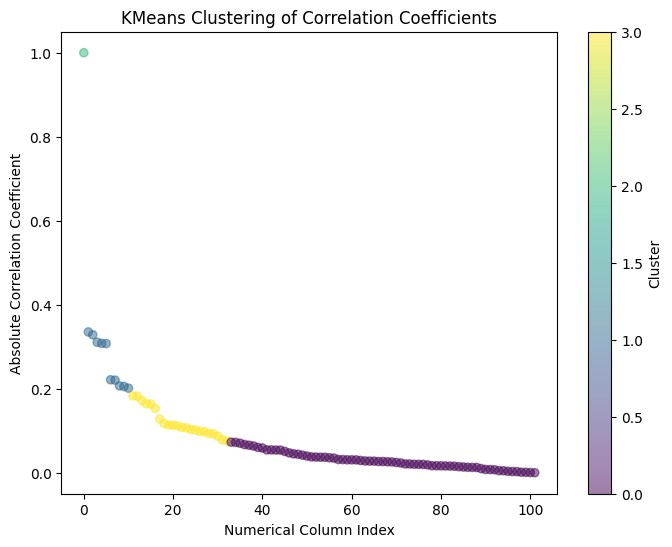

In [659]:
# Visualising correlation coefficients with KMeans
from sklearn.cluster import KMeans
X = corr_dict.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(range(len(corr_dict)), corr_dict.values, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Numerical Column Index')
plt.ylabel('Absolute Correlation Coefficient')
plt.title('KMeans Clustering of Correlation Coefficients')
plt.colorbar(label='Cluster')
plt.show()



In [660]:
# Selecting columns with correlation greater than>5 percent
selected_columns = {col: correlation for col, correlation in corr_dict.items() if correlation > 0.05}

# Print the selected columns and their correlation values
for col, correlation in selected_columns.items():
    print(f"{col}: {correlation}")

Winner: 1.0
B_odds: 0.3354171609573779
R_odds: 0.32871586928229074
R_ev: 0.31088232076220246
B_ev: 0.3081878492397121
B_Women's Flyweight_rank: 0.3077455680043895
b_dec_odds: 0.221583083724362
B_Women's Bantamweight_rank: 0.22076255113468946
R_Women's Flyweight_rank: 0.2070735922824536
b_ko_odds: 0.205756743440299
B_Welterweight_rank: 0.20157714508885988
R_Heavyweight_rank: 0.1831381998702498
r_ko_odds: 0.18258057671816436
R_Women's Bantamweight_rank: 0.17246287869471824
B_Women's Strawweight_rank: 0.16467491170368453
r_dec_odds: 0.1639263926376019
b_sub_odds: 0.15326525026325813
r_sub_odds: 0.12816833945922929
age_dif: 0.11731524976246602
R_Bantamweight_rank: 0.11363736637924854
B_Lightweight_rank: 0.11346861286106957
B_match_weightclass_rank: 0.1122367409774956
R_age: 0.10793153249962678
B_Featherweight_rank: 0.10706604160740332
win_streak_dif: 0.1033604427727739
B_age: 0.10218685783046702
R_Light Heavyweight_rank: 0.09875127378642312
R_Flyweight_rank: 0.09809185411022141
R_match_wei

In [661]:
# Creating the new dataset with the selected columns
column_list=list(selected_columns.keys())
for c in categorical_columns:
    if (c not in column_list):
        column_list.append(c)
new_data=data.loc[:,list(column_list)]
data=new_data

In [662]:
data.isnull().sum()

Winner                            0
B_odds                            0
R_odds                            1
R_ev                              1
B_ev                              0
B_Women's Flyweight_rank       4852
b_dec_odds                      819
B_Women's Bantamweight_rank    4818
R_Women's Flyweight_rank       4837
b_ko_odds                      1062
B_Welterweight_rank            4807
R_Heavyweight_rank             4754
r_ko_odds                      1049
R_Women's Bantamweight_rank    4778
B_Women's Strawweight_rank     4835
r_dec_odds                      803
b_sub_odds                     1061
r_sub_odds                     1049
age_dif                           0
R_Bantamweight_rank            4759
B_Lightweight_rank             4809
B_match_weightclass_rank       4019
R_age                             0
B_Featherweight_rank           4806
win_streak_dif                    0
B_age                             0
R_Light Heavyweight_rank       4755
R_Flyweight_rank            

In [663]:
# Drop columns with more than 2000 null values
data = data.dropna(axis=1, thresh=len(data) - 2000)

In [664]:
# Finding numerical and categorical data
numerical_columns=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')|(data.dtypes=='bool')].index.tolist()

In [665]:
data[categorical_columns].isnull().sum().sort_values()


R_fighter              0
B_fighter              0
date                   0
location               0
country                0
title_bout             0
weight_class           0
gender                 0
R_Stance               0
better_rank            0
B_Stance               2
finish               238
finish_round_time    622
dtype: int64

In [666]:
# Fill null values in column with the mode (most frequent value)
data.loc[:, 'finish'] = data['finish'].fillna(data['finish'].mode()[0])
data.loc[:, 'finish_round_time'] = data['finish_round_time'].fillna(data['finish_round_time'].mode()[0])
data.loc[:, 'B_Stance'] = data['B_Stance'].fillna(data['B_Stance'].mode()[0])

In [667]:
# Fill remaining numerical values with mean
data.loc[:,numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [668]:
data

,Winner,B_odds,R_odds,R_ev,B_ev,b_dec_odds,b_ko_odds,r_ko_odds,r_dec_odds,b_sub_odds,...,location,country,title_bout,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_round_time
0,1,130,-150.0,66.666667,130.000000,900.000000,175.000000,-110.000000,800.000000,1600.000000,...,"Las Vegas, Nevada, USA",USA,False,Light Heavyweight,MALE,Orthodox,Orthodox,Red,U-DEC,5:00
1,0,-200,170.0,170.000000,50.000000,350.000000,120.000000,550.000000,450.000000,1100.000000,...,"Las Vegas, Nevada, USA",USA,False,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00
2,0,-130,110.0,110.000000,76.923077,275.000000,185.000000,600.000000,550.000000,1400.000000,...,"Las Vegas, Nevada, USA",USA,False,Middleweight,MALE,Southpaw,Orthodox,neither,S-DEC,5:00
3,1,475,-675.0,14.814815,475.000000,900.000000,1100.000000,110.000000,175.000000,3500.000000,...,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,1:20
4,0,115,-135.0,74.074074,115.000000,200.000000,600.000000,900.000000,165.000000,1200.000000,...,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,S-DEC,5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0,135,-155.0,64.516129,135.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,0:44
4892,1,175,-210.0,47.619048,175.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Welterweight,MALE,Southpaw,Orthodox,neither,KO/TKO,2:01
4893,1,220,-260.0,38.461538,220.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Heavyweight,MALE,Orthodox,Orthodox,neither,KO/TKO,0:47
4894,1,335,-420.0,23.809524,335.000000,416.544027,647.257173,514.231869,294.064745,1064.543155,...,"Broomfield, Colorado, USA",USA,False,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00


In [669]:
# Finding numerical and categorical data
int_columns=data.dtypes[(data.dtypes=='int64')].index.tolist()
float_columns=data.dtypes[(data.dtypes=='float64')].index.tolist()
categorical_columns=data.dtypes[(data.dtypes=='object')].index.tolist()
boolean_columns=data.dtypes[data.dtypes=='bool'].index.tolist()


In [670]:
data[categorical_columns].describe()

,R_fighter,B_fighter,date,location,country,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_round_time
count,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896
unique,1348,1591,428,145,28,13,2,5,4,3,7,293
top,Donald Cerrone,Charles Oliveira,11/19/2016,"Las Vegas, Nevada, USA",USA,Lightweight,MALE,Orthodox,Orthodox,neither,U-DEC,5:00
freq,24,18,24,1251,2450,855,4384,3682,3712,3522,2016,2763


In [671]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in categorical_columns:
    # Convert column dtype to string (if necessary)
    data.loc[:, col] = data[col].astype(str)
    data.loc[:, col] = LE.fit_transform(data[col])


In [672]:
from sklearn.preprocessing import MinMaxScaler
# Applying MinMax Scaler
scaler = MinMaxScaler()
for col in int_columns:
    column_data = data[col].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_data)
    scaled_data = scaled_data.astype(data[col].dtype)
    data.loc[:,col] = scaled_data




In [673]:
data[int_columns].describe()

,Winner,B_odds,age_dif,R_age,win_streak_dif,B_age,R_losses,R_win_by_Decision_Split,R_current_win_streak,R_current_lose_streak,loss_dif,B_current_win_streak
count,4896.000000,4896.000000,4896.000000,4896.0,4896.000000,4896.0,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,0.583946,0.000204,0.000408,0.0,0.000204,0.0,0.000408,0.000204,0.000408,0.000204,0.000204,0.000204
std,0.492953,0.014292,0.020209,0.0,0.014292,0.0,0.020209,0.014292,0.020209,0.014292,0.014292,0.014292
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [674]:
# Separating features and label
y=data['Winner']
X=data.drop(['Winner'], axis=1)

In [675]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [676]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=3),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=10),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1500),
    'Support Vector Machine': SVC(),
}

print("\n\nUsing most correlated columns")
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    




Using most correlated columns
Decision Tree 0.5683673469387756
Random Forest 0.6438775510204081
K Nearest Neighbour 0.6183673469387755
Neural Network 0.5438775510204081
Support Vector Machine 0.6520408163265307
Gradient Boosting 0.6448979591836734
Gaussian Naive Bayes 0.6530612244897959
Average accuracy 0.6177842565597668


**Using PCA+Machine Learning**

In [677]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('fight_data.csv')
label=data['Winner']
data.drop(['Winner','date'],axis=1, inplace=True)


In [678]:
# Step 1: Data Cleaning
columns_to_drop = data.columns[data.isnull().mean() > 0.5]
data.drop(columns=columns_to_drop, inplace=True)

In [679]:
# Impute missing values for numerical columns with mean
numerical_columns = data.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])



In [680]:
# Step 2: Feature Engineering
data = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns)


In [681]:
# Standardize numerical features
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])



In [682]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_result = pca.fit_transform(data)



In [683]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result, label, test_size=0.2, random_state=42)



In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=3),
    'K Nearest Neighbour': KNeighborsClassifier(n_neighbors=10),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 60, 70), max_iter=400),
    'Support Vector Machine': SVC()
}

print('\n\nUsing PCA+Machine Learning')
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)
    





Using PCA+Machine Learning
Decision Tree 0.5612244897959183
Random Forest 0.6091836734693877
K Nearest Neighbour 0.5510204081632653
Neural Network 0.5806122448979592
Support Vector Machine 0.636734693877551
